In [195]:
#import basic modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from datetime import timedelta
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

sns.set()

import networkx as nx
import matplotlib.pyplot as plt
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

from nycflights13 import flights

# flights is the combined, tidied data, but can also import individual pieces..
from nycflights13 import airports

# Main Questions

1. Flight Schedule What can we say about the recurrent flight schedule? What are recurring patterns
    of variation? Identifying changes or deviance from the recurring behavior.
    
2. Flight Delays What are the patterns of flight delays (both short and long)? Can we find potential
    causes for further investigation?

In [197]:
# Try Chartify package for data visualization 

In [176]:
flights
airports

# pd.merge(flights,airports[['faa','lat','lon']],left_on='dest',right_on='faa')


flights['origin'].unique()

dest = flights['dest'].unique()
dest
dest = pd.DataFrame(dest,columns=['Ports'])

dest

,Ports
0,IAH
1,MIA
2,BQN
3,ATL
4,ORD
...,...
100,LEX
101,CHO
102,TVC
103,ANC


In [194]:
flights[flights.dest == 'BQN']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
719,2013,1,1,1929.0,1920,9.0,3.0,7,-4.0,UA,1071,N27205,EWR,BQN,192.0,1585,19,20,2013-01-02T00:00:00Z
837,2013,1,1,2356.0,2359,-3.0,425.0,437,-12.0,B6,727,N588JB,JFK,BQN,186.0,1576,23,59,2013-01-02T04:00:00Z
848,2013,1,2,539.0,545,-6.0,959.0,1022,-23.0,B6,725,N624JB,JFK,BQN,184.0,1576,5,45,2013-01-02T10:00:00Z
1710,2013,1,2,2040.0,2028,12.0,110.0,115,-5.0,UA,1071,N33289,EWR,BQN,190.0,1585,20,28,2013-01-03T01:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334113,2013,9,27,2023.0,2025,-2.0,23.0,26,-3.0,UA,1071,N33292,EWR,BQN,207.0,1585,20,25,2013-09-28T00:00:00Z
334192,2013,9,28,548.0,550,-2.0,931.0,932,-1.0,B6,939,N636JB,JFK,BQN,203.0,1576,5,50,2013-09-28T09:00:00Z
334872,2013,9,29,546.0,550,-4.0,938.0,932,6.0,B6,939,N705JB,JFK,BQN,209.0,1576,5,50,2013-09-29T09:00:00Z
335752,2013,9,29,2132.0,2055,37.0,117.0,56,21.0,UA,1071,N68452,EWR,BQN,206.0,1585,20,55,2013-09-30T00:00:00Z


In [183]:
# airports[(airports['faa'].isin(dest['Destinations'].values))]

# dest[(dest.isin(airports['faa'].values))]



# airports= airports[['faa','lat','lon']]
# 
# airports = airports.rename(columns = {'faa':'Ports'})



a = pd.merge(dest,airports,on = 'Ports',how='left')

a = a.fillna(0)

a[a.lat == 0]

,Ports,lat,lon
2,BQN,0.0,0.0
18,SJU,0.0,0.0
51,STT,0.0,0.0
86,PSE,0.0,0.0


In [31]:
NumofFlights = df.groupby(['origin','dest']).agg({'air_time':'count'}).reset_index().rename(columns = {'air_time':'NumOfFlights'})
NumofFlights

,origin,dest,NumOfFlights
0,EWR,ALB,418
1,EWR,ANC,8
2,EWR,ATL,4876
3,EWR,AUS,957
4,EWR,AVL,251
...,...,...,...
219,LGA,SYR,269
220,LGA,TPA,2126
221,LGA,TVC,73
222,LGA,TYS,265


In [33]:
NumofFlights

graph = nx.from_pandas_edgelist(NumofFlights, source = 'origin', target = 'dest', edge_attr = 'NumOfFlights',create_using = nx.DiGraph())

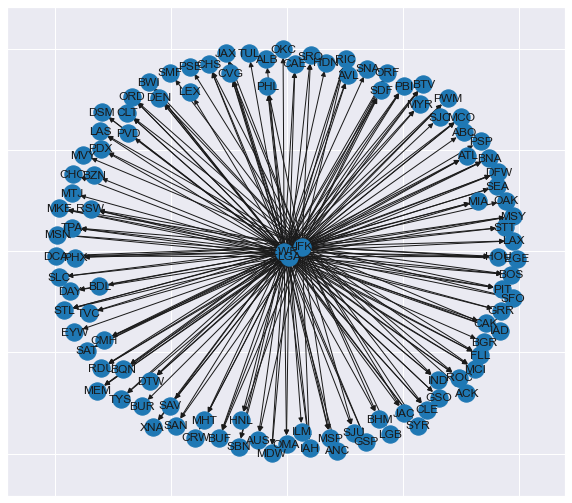

In [35]:
plt.figure(figsize = (10,9))
nx.draw_networkx(graph)
plt.show()

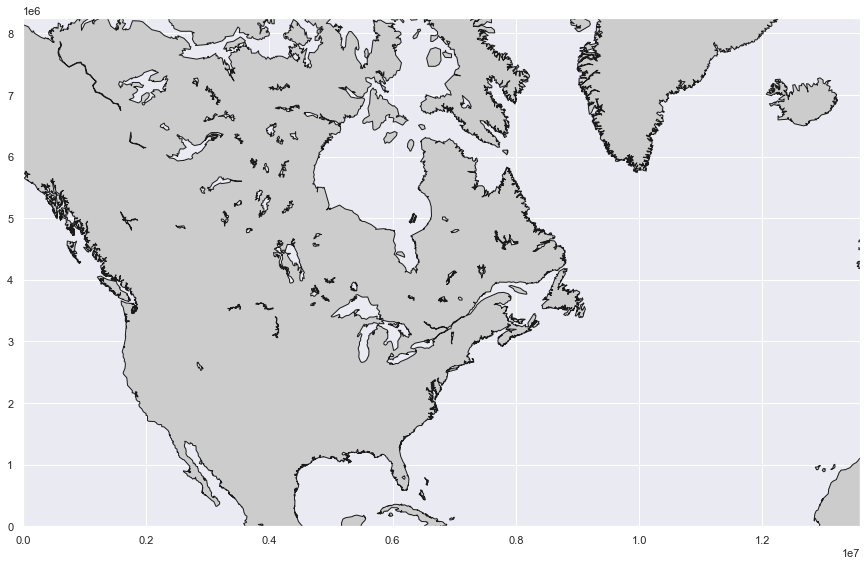

In [123]:
plt.figure(figsize=(15,20))

m = Basemap(projection='merc',llcrnrlon=-140,llcrnrlat=20,urcrnrlon=-10,
urcrnrlat=70, lat_ts=20, resolution='l',suppress_ticks=False)

# m.readshapefile(r'C:\Users\user\Desktop\JUSTDOIT\HUJI\M.A\Statistical Learning\Lab -1\st99_d00',
#                 name='states', drawbounds=True)


m.drawcoastlines()
m.fillcontinents()


plt.show()

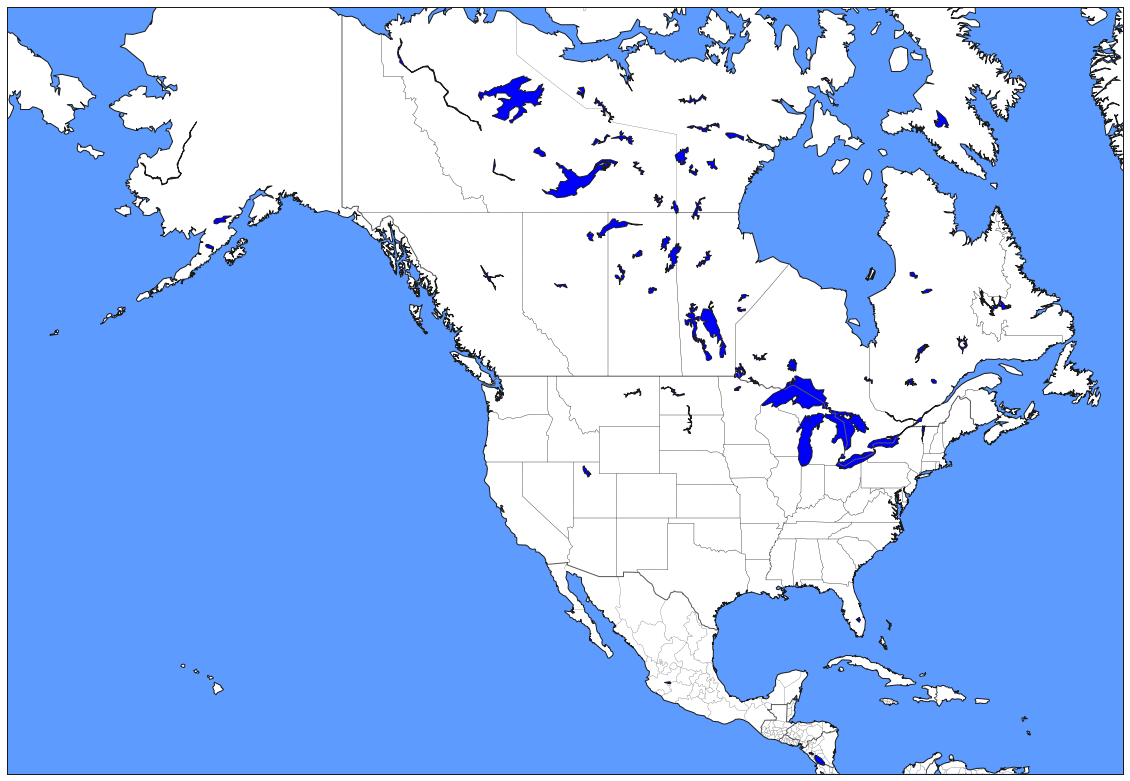

In [126]:

plt.figure(figsize = (20,20))
m = Basemap(projection='merc',llcrnrlon=-180,llcrnrlat=10,urcrnrlon=-50,
            urcrnrlat=70, lat_ts=0, resolution='l')
m.drawmapboundary(fill_color='#5D9BFF')
m.fillcontinents(color='white',lake_color='blue')
m.drawcountries(color='#585858',linewidth=1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines()
Points = {"New York":(40.7,-74),"DC":(38.9,-77),"LA":(34.1,-118.2),"San Francisco":(37.8,-122.4)}
Lon = [Points[key][0] for key in Points]
Lat = [Points[key][1] for key in Points]
X, Y = m(Lat,Lon)
# m.scatter(X,Y,zorder=5,s=200,color="#DE1D1D",marker="^")
plt.show()